
 ### Project: Building a Credit Approval Model using Neural Networks 
    
##### Didier Iradukunda

In [1]:
# importing useful libraries for the programming tasks
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import sklearn.neural_network
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [2]:
# read the dataset
credit_data = pd.read_csv('crx.data', header = None)
credit_data.head(5)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


In [3]:
# rename columns
credit_data.columns=['A1','A2','A3','A4','A5','A6','A7','A8','A9','A10','A11','A12','A13','A14','A15','A16']
credit_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,00260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,00200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,00200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,00280,750,-


# Basic insights from the data

In [4]:
# summary statistics
print(f'{credit_data.describe()}\n')
# Print DataFrame information
print(f'{credit_data.info()}\n')
# last five values of the dataset
print(credit_data.tail(5))

               A3          A8        A11            A15
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    object 
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non

In [5]:
# save the CSV file
credit_data.to_csv('diraduku_project.csv', index = False)

# Exploratory Data Analysis (EDA)

In [6]:
# checking missingvalues
credit_data.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [7]:
# replace the questions marls with NaN 
credit_data = credit_data.replace('?', np.nan)

In [8]:
# replace in numerical data the NaN with the mean
credit_data.fillna(credit_data.mean(), inplace=True)

In [9]:
# checking missingvalues
print(f'{credit_data.isnull().sum()}\n')

A1     12
A2     12
A3      0
A4      6
A5      6
A6      9
A7      9
A8      0
A9      0
A10     0
A11     0
A12     0
A13     0
A14    13
A15     0
A16     0
dtype: int64



In [10]:
# replace in categorical data the NaN with the mode
credit_data.fillna(credit_data.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [11]:
# checking missingvalues
credit_data.isna().sum()

A1     0
A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    0
A13    0
A14    0
A15    0
A16    0
dtype: int64

In [12]:
# changing from object to numeric
credit_data[['A2']] = credit_data[['A2']].apply(pd.to_numeric) 
credit_data[['A14']] = credit_data[['A14']].apply(pd.to_numeric) 

In [13]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    object 
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    object 
 4   A5      690 non-null    object 
 5   A6      690 non-null    object 
 6   A7      690 non-null    object 
 7   A8      690 non-null    float64
 8   A9      690 non-null    object 
 9   A10     690 non-null    object 
 10  A11     690 non-null    int64  
 11  A12     690 non-null    object 
 12  A13     690 non-null    object 
 13  A14     690 non-null    int64  
 14  A15     690 non-null    int64  
 15  A16     690 non-null    object 
dtypes: float64(3), int64(3), object(10)
memory usage: 86.4+ KB


# Data visualization

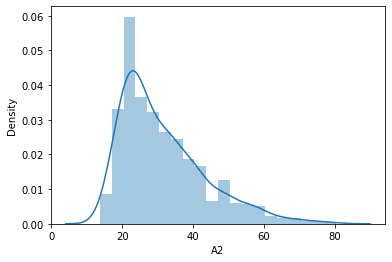

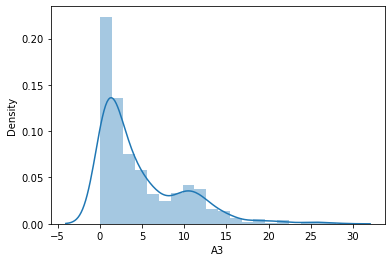

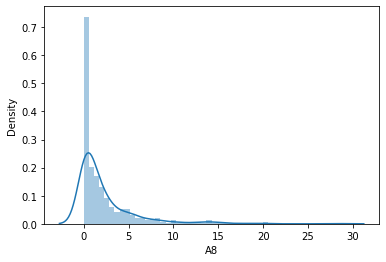

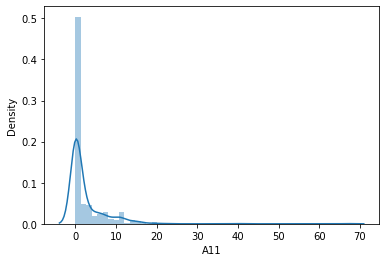

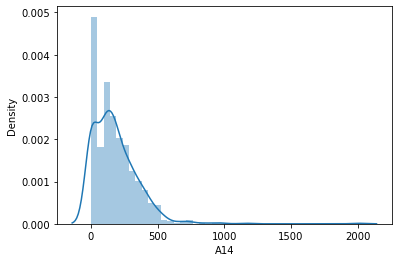

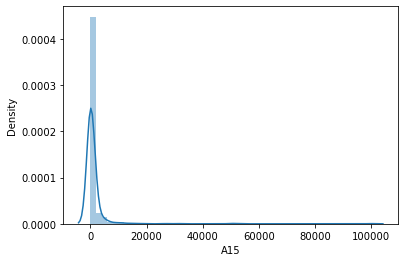

In [14]:
def plotDistPlot(col):
    """Flexibly plot a univariate distribution of observation"""
    sns.distplot(col)
    plt.show()
plotDistPlot(credit_data['A2'])
plotDistPlot(credit_data['A3'])
plotDistPlot(credit_data['A8'])
plotDistPlot(credit_data['A11'])
plotDistPlot(credit_data['A14'])
plotDistPlot(credit_data['A15'])

<AxesSubplot:xlabel='A16', ylabel='count'>

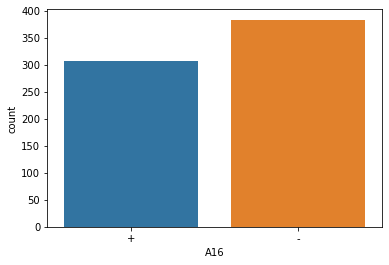

In [15]:
sns.countplot(data = credit_data, x = 'A16')

Correlation matrix


<AxesSubplot:>

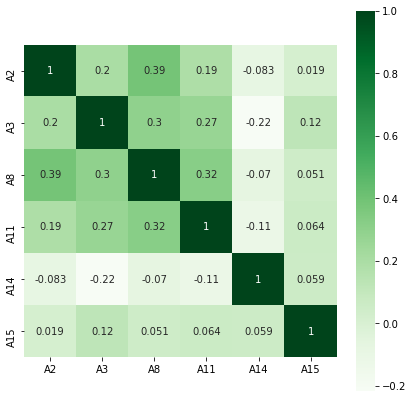

In [16]:
# correlation with heatmap
correlation = credit_data.corr()
print('Correlation matrix')
f, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(correlation,square=True,annot=True,cmap='Greens')

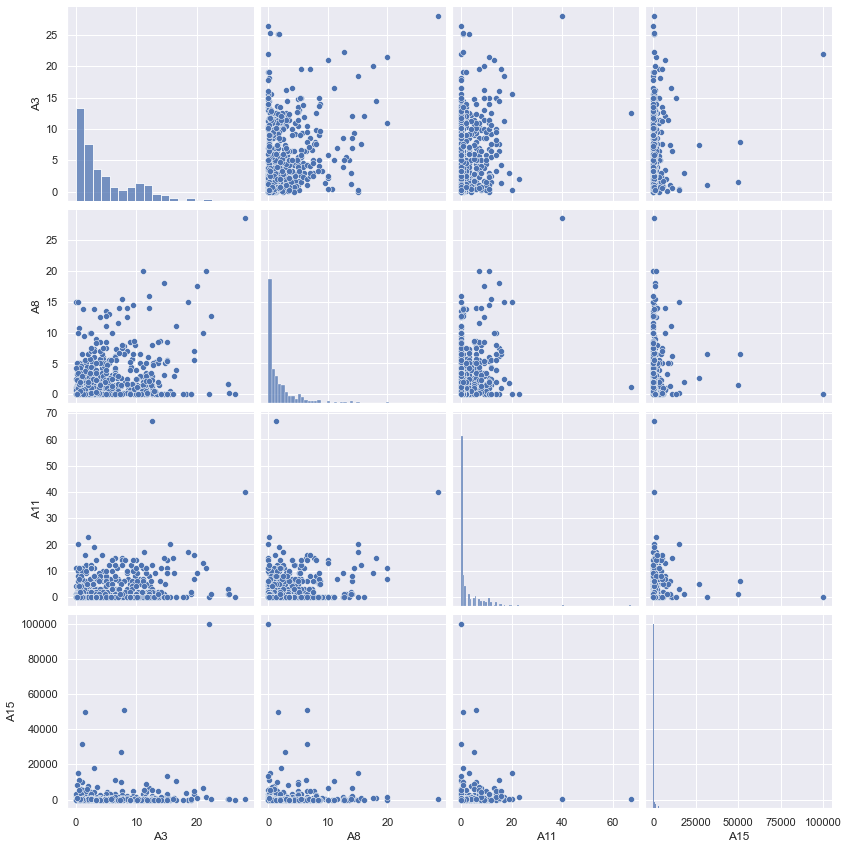

In [17]:
# pair plot
sns.set()
cols = ['A3','A8', 'A11','A15']
sns.pairplot(credit_data[cols], size = 3)
plt.show()

# Outliers

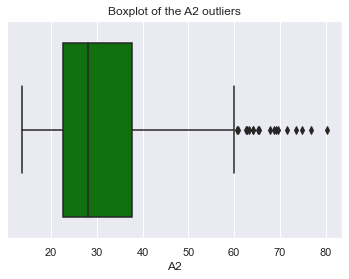

In [18]:
sns.boxplot(credit_data.A2, color='green')
plt.title("Boxplot of the A2 outliers")
plt.xlabel('A2')
plt.show()

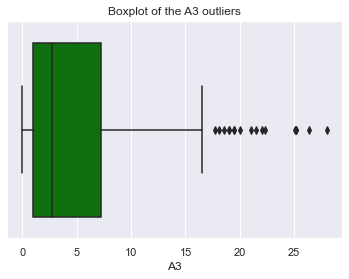

In [19]:
sns.boxplot(credit_data.A3, color='green')
plt.title("Boxplot of the A3 outliers")
plt.xlabel('A3')
plt.show()

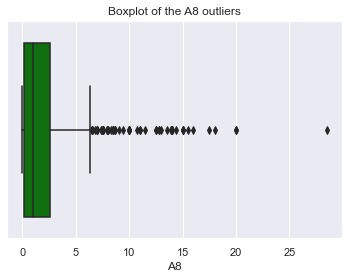

In [20]:
sns.boxplot(credit_data.A8, color='green')
plt.title("Boxplot of the A8 outliers")
plt.xlabel('A8')
plt.show()

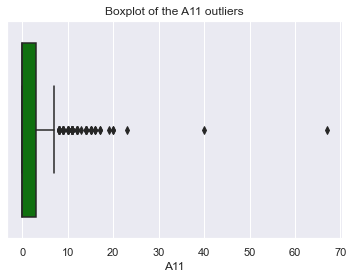

In [21]:
sns.boxplot(credit_data.A11, color='green')
plt.title("Boxplot of the A11 outliers")
plt.xlabel('A11')
plt.show()

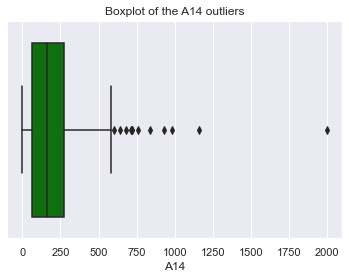

In [22]:
sns.boxplot(credit_data.A14, color='green')
plt.title("Boxplot of the A14 outliers")
plt.xlabel('A14')
plt.show()

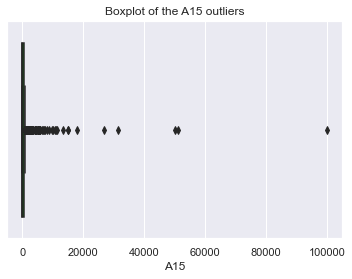

In [23]:
sns.boxplot(credit_data.A15, color='green')
plt.title("Boxplot of the A15 outliers")
plt.xlabel('A15')
plt.show()

# Encoding

# Feature  selection and feature engineering

In [24]:
# credit_data.drop(['A14'],axis = 1)

In [25]:
from scipy import stats
z_scores = stats.zscore(credit_data[['A2','A3','A8','A11','A14','A15']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
credit_data = credit_data[filtered_entries]
credit_data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120,0,+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,b,21.08,10.085,y,p,e,h,1.25,f,f,0,f,g,260,0,-
686,a,22.67,0.750,u,g,c,v,2.00,f,t,2,t,g,200,394,-
687,a,25.25,13.500,y,p,ff,ff,2.00,f,t,1,t,g,200,1,-
688,b,17.92,0.205,u,g,aa,v,0.04,f,f,0,f,g,280,750,-


In [26]:
# credit_data['A2'] = credit_data['A2'].astype('float')

In [27]:
scaler=MinMaxScaler()
credit_data[['A2','A3','A8','A11','A14','A15']] = scaler.fit_transform(credit_data[['A2','A3','A8','A11','A14','A15']])

In [28]:
for i in  credit_data.select_dtypes(include=['object']).columns:
    print(f'{i}:{credit_data[i].unique()}')

A1:['b' 'a']
A4:['u' 'y' 'l']
A5:['g' 'p' 'gg']
A6:['w' 'q' 'm' 'cc' 'k' 'c' 'd' 'x' 'i' 'e' 'aa' 'ff' 'j' 'r']
A7:['v' 'h' 'bb' 'ff' 'j' 'o' 'dd' 'n' 'z']
A9:['t' 'f']
A10:['t' 'f']
A12:['f' 't']
A13:['g' 's' 'p']
A16:['+' '-']


In [29]:
credit_data= pd.get_dummies(credit_data,columns=['A1','A4','A5','A6','A7','A9','A10','A12','A13'])
credit_data

,A2,A3,A8,A11,A14,A15,A16,A1_a,A1_b,A4_l,...,A7_z,A9_f,A9_t,A10_f,A10_t,A12_f,A12_t,A13_g,A13_p,A13_s
0,0.332166,0.000000,0.108696,0.0625,0.297059,0.000000,+,0,1,0,...,0,0,1,0,1,1,0,1,0,0
1,0.873590,0.228718,0.264348,0.3750,0.063235,0.037066,+,1,0,0,...,0,0,1,0,1,1,0,1,0,0
2,0.209063,0.025641,0.130435,0.0000,0.411765,0.054541,+,1,0,0,...,0,0,1,1,0,1,0,1,0,0
3,0.273823,0.078974,0.326087,0.3125,0.147059,0.000199,+,0,1,0,...,0,0,1,0,1,0,1,1,0,0
4,0.124854,0.288462,0.148696,0.0000,0.176471,0.000000,+,0,1,0,...,0,0,1,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,0.142552,0.517179,0.108696,0.0000,0.382353,0.000000,-,0,1,0,...,0,1,0,1,0,1,0,1,0,0
686,0.173473,0.038462,0.173913,0.1250,0.294118,0.026079,-,1,0,0,...,0,1,0,0,1,0,1,1,0,0
687,0.223648,0.692308,0.173913,0.0625,0.294118,0.000066,-,1,0,0,...,0,1,0,0,1,0,1,1,0,0
688,0.081097,0.010513,0.003478,0.0000,0.411765,0.049643,-,0,1,0,...,0,1,0,1,0,1,0,1,0,0


# Label encoding

In [30]:
credit_data['A16']=LabelEncoder().fit_transform(credit_data['A16'])

# Building the neural network model

In [31]:
X = credit_data.loc[:, credit_data.columns != 'A16']
y= credit_data[['A16']]

In [32]:
mlp = MLPClassifier()
mlp.fit(X,y)
y_pred = mlp.predict(X)
y_pred 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
kfold=KFold(n_splits=10,shuffle = True,random_state=0)
fold_Precision = cross_val_score(mlp, X, y, cv=kfold, scoring='precision_weighted')
print(f"Precision:{np.mean(fold_Precision):.3f}")
fold_f1 = cross_val_score(mlp, X, y, cv=kfold, scoring='f1_weighted')
print(f"f1_score:{np.mean(fold_f1):.3f}")
model_param=[np.round(np.mean(fold_Precision),3),np.round(np.mean(fold_f1),3)]

Precision:0.859
f1_score:0.866


# hyper parameter tuning 

In [34]:
mlp = MLPClassifier()
sample_parameters = {'hidden_layer_sizes':[(10,10,10),(30,30,30),(30,40,30),(50,100,50)],'max_iter':[1,10,50],'activation':['identity','logistic','tanh','relu'],'learning_rate':['constant','adaptive'],'solver':['sdg','adam','lbfgs']}

In [35]:
kfold=KFold(n_splits=10,shuffle = True,random_state=0)
search_mlp = GridSearchCV(mlp,param_grid=sample_parameters, scoring='accuracy',cv=kfold)

In [36]:
search_mlp.fit(X,y)

GridSearchCV(cv=KFold(n_splits=10, random_state=0, shuffle=True),
             estimator=MLPClassifier(),
             param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'],
                         'hidden_layer_sizes': [(10, 10, 10), (30, 30, 30),
                                                (30, 40, 30), (50, 100, 50)],
                         'learning_rate': ['constant', 'adaptive'],
                         'max_iter': [1, 10, 50],
                         'solver': ['sdg', 'adam', 'lbfgs']},
             scoring='accuracy')

In [37]:
best_param = search_mlp.best_params_

In [38]:
MLP = MLPClassifier(activation=best_param['activation'],hidden_layer_sizes=best_param['hidden_layer_sizes'],learning_rate=best_param['learning_rate'],max_iter=best_param['max_iter'],solver=best_param['solver'])

In [39]:
MLP.fit(X,y)

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=10, solver='lbfgs')

In [40]:
kfold=KFold(n_splits=10,shuffle = True,random_state=0)
fold_Precision_tn = cross_val_score(MLP, X, y, cv=kfold, scoring='precision_weighted')
print(f"Precision:{np.mean(fold_Precision_tn):.3f}")
fold_f1_tn = cross_val_score(MLP, X, y, cv=kfold, scoring='f1_weighted')
print(f"f1_score:{np.mean(fold_f1_tn):.3f}")
model_param_tn=[np.round(np.mean(fold_Precision_tn),3),np.round(np.mean(fold_f1_tn),3)]

Precision:0.864
f1_score:0.860


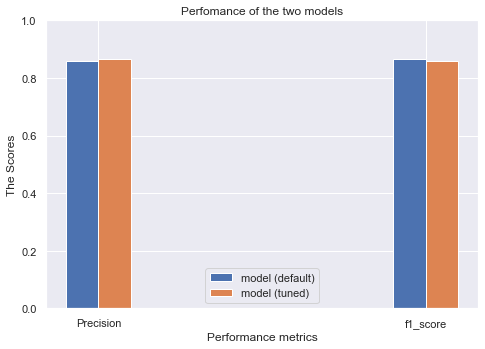

In [41]:
metrics=['Precision','f1_score']
x=np.arange(2)
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.bar(x,model_param,width=0.1,label='model (default)')
ax.bar(x+0.1,model_param_tn,width=0.1,label='model (tuned)')
plt.xticks( [i+0.05 for i in x],metrics)
plt.title('Perfomance of the two models')
plt.yticks(np.arange(0,1.2,0.2))
plt.ylabel('The Scores')
plt.xlabel('Performance metrics')
plt.legend()
plt.show()